## Problem: Reverse a sublist
LeetCode: 92. Reverse Linked List II

https://leetcode.com/problems/reverse-linked-list-ii/

Given the head of a singly linked list and two integers left and right where left <= right, reverse the nodes of the list from position left to position right, and return the reversed list.

 

Example 1:

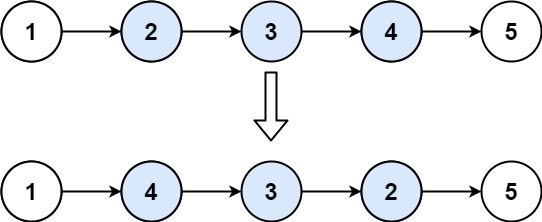

    Input: head = [1,2,3,4,5], left = 2, right = 4
    Output: [1,4,3,2,5]
Example 2:

    Input: head = [5], left = 1, right = 1
    Output: [5]
 

Constraints:

The number of nodes in the list is n.
    1 <= n <= 500
    -500 <= Node.val <= 500
    1 <= left <= right <= n


### Approach:
1. Get the sublist and prev node of the start of sublist and next node of the end of sublist.
    a. Iterate the list, Left counter should be greater than 1, and right counter should be greater than 0
    b. Keep updating prev before moving leftNode to next and keep updating rightNode before moving after to next node
2. Sublist head is the leftNode. Call reverse method and pass the leftNode as head. Before calling mehod, make sure to set lastnode's next to None. Here, rightNode.next = None
3. Reverse will return newHead and newTail.
4. prev.next = newHead and newtail.next = newTail. However, if subList start from first node itself, then prev would be None. In that condition, head will point to newHead.

In [48]:
# This is to create a link list
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None

def insertNode(head, val):
    newNode = Node(val)
    if head == None:
        head = newNode
        return head
    temp = head
    while temp.next != None:
        temp = temp.next
    temp.next = newNode
    return head


def printLinkedList(head):
    if not head:
        print("Empty Linked list")
    temp = head
    while temp.next:
        print(temp.val, end = "->")
        temp = temp.next
    print(temp.val)

In [49]:
def reverseBetween(head, left, right):
    prev, leftNode = None, head
    after, rightNode = head, None
# Prev will point to prev node of start of sublist.
# after will point to next node after sublist
## Get the Sublist.      
    while right > 0:
        if left > 1:
            prev = leftNode
            leftNode = leftNode.next
            left -= 1
        rightNode = after
        after = after.next
        right -= 1

# Set the last node of sublist None
    if rightNode:
        rightNode.next = None
# Reverse the list
    newHead, newTail = reverse(leftNode)
# If prev is None, that means, sublist start from 1st node, so head will point to newHead
    if prev:
        prev.next = newHead
    else:
        head = newHead
# Revers sublist tail should connect to next part of list
    newTail.next = after
    return head

def reverse(head):
    
    prev, cur = None, head
    
    while cur:
        temp = cur
        cur = cur.next
        temp.next = prev
        prev = temp
    return prev, head
       

In [50]:
head = None
head = insertNode(head, 1)
head = insertNode(head, 2)
head = insertNode(head, 3)
head = insertNode(head, 4)
head = insertNode(head, 5)

print("****Input List****")
printLinkedList(head)

left = 2
right = 4
head = reverseBetween(head, left, right)
print("****Output List****")
printLinkedList(head)

****Input List****
1->2->3->4->5
****Output List****
1->4->3->2->5


In [51]:
head = None
head = insertNode(head, 1)
print("****Input List****")
printLinkedList(head)
left = 1
right = 1
head = reverseBetween(head, left, right)
print("****Output List****")
printLinkedList(head)

****Input List****
1
****Output List****
1


In [52]:
head = None
head = insertNode(head, 3)
head = insertNode(head, 5)
print("****Input List****")
printLinkedList(head)
left = 1
right = 2
head = reverseBetween(head, left, right)
print("****Output List****")
printLinkedList(head)

****Input List****
3->5
****Output List****
5->3
